- separare in train e test set rivela i casi di overfitting
- ma se faccio tanti esperimenti posso avere dei leak
- posso separare in train, validation e test, ma
 - i dati diminuiscono
 - devo trovare il modo di ripetere l'esperimento con set diversi
- k-fold ci salva dal problema!
 - usa tutti i dati di training, costruendo k modelli
 - ripete più volte l'esperimento e ho statistiche di performance

In [29]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [22]:
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [23]:
model = DecisionTreeClassifier(max_depth=8)

Qui posso lavorare sulle feature quanto voglio senza paura di leak

In [36]:

kfold_scores = cross_validate(model, X_train, y_train, cv=10,
                             scoring=['accuracy', 'precision_macro', 'recall_macro'],
                             return_train_score=True,
                             return_estimator=True)

In [37]:
kfold_scores

{'fit_time': array([0.0159564 , 0.01396251, 0.01396155, 0.01097035, 0.01097059,
        0.0119679 , 0.0119679 , 0.01297808, 0.01097059, 0.0119679 ]),
 'score_time': array([0.00399113, 0.00199556, 0.00099754, 0.00200367, 0.00199461,
        0.00099754, 0.0009973 , 0.00098443, 0.00099778, 0.00099754]),
 'estimator': (DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=8, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'),
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=8, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                

In [38]:
df = pd.DataFrame(kfold_scores)
df

,fit_time,score_time,estimator,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.015956,0.003991,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.829630,0.933168,0.839010,0.933863,0.829524,0.932747
1,0.013963,0.001996,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.844444,0.934818,0.859364,0.940869,0.844212,0.934622
2,0.013962,0.000998,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.814815,0.943894,0.825292,0.945901,0.813736,0.944290
3,0.010970,0.002004,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.881481,0.933168,0.883700,0.936311,0.882418,0.933767
4,0.010971,0.001995,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.792593,0.931518,0.797808,0.934660,0.792857,0.931168
5,0.011968,0.000998,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.844444,0.926568,0.851425,0.927396,0.846703,0.926254
6,0.011968,0.000997,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.777778,0.948020,0.814587,0.950419,0.776374,0.948190
7,0.012978,0.000984,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.858209,0.941467,0.862637,0.943292,0.857747,0.941158
8,0.010971,0.000998,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.910448,0.920857,0.913443,0.924577,0.911868,0.920464
9,0.011968,0.000998,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.813433,0.934872,0.839894,0.938347,0.812418,0.934744


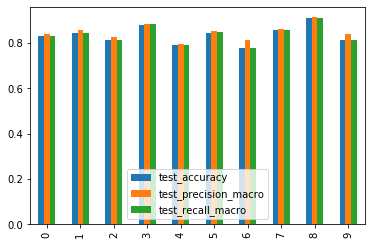

In [40]:
#plt.plot(df['test_accuracy'], label='test_acc')
#plt.plot(df['test_preci'], x=df.index, y='test_precision_micro')
df[ ['test_accuracy', 'test_precision_macro', 'test_recall_macro'] ].plot.bar()

In [41]:
df.describe()

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.012567,0.001596,0.836727,0.934835,0.848716,0.937563,0.836786,0.934740
std,0.001642,0.000965,0.040158,0.008029,0.033674,0.007992,0.040920,0.008211
min,0.010970,0.000984,0.777778,0.920857,0.797808,0.924577,0.776374,0.920464
25%,0.011220,0.000998,0.813778,0.931931,0.828721,0.934062,0.812747,0.931562
50%,0.011968,0.000998,0.837037,0.933993,0.845659,0.937329,0.836868,0.934195
75%,0.013716,0.001995,0.854768,0.939819,0.861819,0.942686,0.854986,0.939554
max,0.015956,0.003991,0.910448,0.948020,0.913443,0.950419,0.911868,0.948190


In [43]:
model = DecisionTreeClassifier(max_depth=8)
# iperparametro. Più in là vedremo la grid search
# che ci permette di trovarli in automatico in combo con la CV

model.fit(X_train, y_train)
model.score(X_test, y_test) # .score da introdurre

0.8533333333333334